In [1]:
import math
import copy 

trainingSet=[[-6.760253967, -2.438752346, {'N2':0}],
             [0.237898221, -8.227674233, {'N2':0}],
             [2.009493698, 0.624965172, {'N2':0}],
             [-9.850935055, 0.177774415, {'N2':0}],
             [-1.074827999, -8.673790996, {'N2':0}],
             [-1.196867834, 8.340757213, {'N2':0}],
             [7.636788176, 9.787537954, {'N2':0}],
             [-0.631972955, 5.123219783, {'N2':0}],
             [-8.275424397, -2.379849503, {'N2':0}],
             [-0.198644854, -8.716467283, {'N2':0}],
             [-8.487350193, -6.664567141, {'N2':0}],
             [4.282803715, 9.960294905, {'N2':0}],
             [0.695373967, 7.200536487, {'N2':0}],
             [-3.946295695, -5.071598904, {'N2':0}],
             [1.854858464, -3.647527918, {'N2':1}],
             [5.367410112, -5.913741893, {'N2':1}],
             [1.592264761, -0.535855236, {'N2':1}],
             [-0.889237009, 1.85876023, {'N2':1}],
             [8.59138084, -8.970128822, {'N2':1}],
             [1.263323457, -1.80663509, {'N2':1}],             
             [-7.410347826, 5.641824978, {'N2':1}]]


In [2]:
neuralNet = {'Input':{'I0':0, 'I1':0},
             'Layer0':{'N0':{'Out':0, 'Bias':0.4, 'I0':1.4, 'I1':1.0},
                       'N1':{'Out':0, 'Bias':-1.5, 'I0':1.0, 'I1':-0.5}},
             'Layer1':{'N2':{'Out':0, 'Bias':5.4, 'N0':-8.0, 'N1':-10.0}}
            }

In [3]:
import numpy as np

def calcSum(vals):
    return np.sum(vals)

def calcSigmoide(x):
    return 1/(1+np.exp(-x))

neuralNet1 = neuralNet.copy()

neuralNet1['Input']['I0'] = trainingSet[0][0]
neuralNet1['Input']['I1'] = trainingSet[0][1]

lis1 = np.array([neuralNet1['Layer0']['N0']['I0']*neuralNet1['Input']['I0'], neuralNet1['Layer0']['N0']['I1']*neuralNet1['Input']['I1'], neuralNet1['Layer0']['N0']['Bias']])
sumVal1 = calcSum(lis1)
sigmoidVal1 = calcSigmoide(sumVal1)

lis1 = np.array([neuralNet1['Layer0']['N1']['I0']*neuralNet1['Input']['I0'], neuralNet1['Layer0']['N1']['I1']*neuralNet1['Input']['I1'], neuralNet1['Layer0']['N1']['Bias']])
sumVal1 = calcSum(lis1)
sigmoidVal1 = calcSigmoide(sumVal1)

neuralNet1['Layer0']['N0']['Out'] = sigmoidVal1
neuralNet1['Layer0']['N1']['Out'] = sigmoidVal1

lis1 = np.array([neuralNet1['Layer1']['N2']['N0']*neuralNet1['Layer0']['N0']['Out'], neuralNet1['Layer1']['N2']['N1']*neuralNet1['Layer0']['N1']['Out'], neuralNet1['Layer1']['N2']['Bias']])
sumVal1 = calcSum(lis1)
sigmoidVal1 = calcSigmoide(sumVal1)

neuralNet1['Layer1']['N2']['Out'] = sigmoidVal1

print("Sum: " + str(sumVal1))
print("Sigmoid: " + str(sigmoidVal1))

Sum: 5.38425733932243
Sigmoid: 0.9954327092883841


In [4]:
def calcDelta(o, t, final):
    if final:
        return o*(1-o)*(t-o)
    else:
        return o*(1-o)*t

deltaF1 = calcDelta(neuralNet1['Layer1']['N2']['Out'], trainingSet[0][2]["N2"], True)
delta1 = np.array([calcDelta(neuralNet1['Layer0']['N0']['Out'], neuralNet1['Layer1']['N2']['N0']*deltaF1, False), 
                   calcDelta(neuralNet1['Layer0']['N1']['Out'], neuralNet1['Layer1']['N2']['N1']*deltaF1, False), 
                   deltaF1])
print(delta1)

[ 3.16372036e-05  3.95465046e-05 -4.52566570e-03]


In [5]:
def calcWeight (w, fa, delt, x):
    return w+fa*delt*x

newWeight1 = np.array([[calcWeight(neuralNet1['Layer0']['N0']['Bias'], 0.1, delta1[0], 1),
                       calcWeight(neuralNet1['Layer0']['N0']['I0'], 0.1, delta1[0], neuralNet1['Input']['I0']),
                       calcWeight(neuralNet1['Layer0']['N0']['I1'], 0.1, delta1[0], neuralNet1['Input']['I1'])],
                      [calcWeight(neuralNet1['Layer0']['N1']['Bias'], 0.1, delta1[1], 1),
                       calcWeight(neuralNet1['Layer0']['N1']['I0'], 0.1, delta1[1], neuralNet1['Input']['I0']),
                       calcWeight(neuralNet1['Layer0']['N1']['I1'], 0.1, delta1[1], neuralNet1['Input']['I1'])],
                      [calcWeight(neuralNet1['Layer1']['N2']['Bias'], 0.1, delta1[2], 1),
                       calcWeight(neuralNet1['Layer1']['N2']['N0'], 0.1, delta1[2], neuralNet1['Layer0']['N0']['Out']),
                       calcWeight(neuralNet1['Layer1']['N2']['N1'], 0.1, delta1[2], neuralNet1['Layer0']['N1']['Out'])]])

neuralNet1['Layer0']['N0']['Bias'], neuralNet1['Layer0']['N0']['I0'], neuralNet1['Layer0']['N0']['I1'] = newWeight1[0]
neuralNet1['Layer0']['N1']['Bias'], neuralNet1['Layer0']['N1']['I0'], neuralNet1['Layer0']['N1']['I1'] = newWeight1[1]
neuralNet1['Layer1']['N2']['Bias'], neuralNet1['Layer1']['N2']['N0'], neuralNet1['Layer1']['N2']['N1'] = newWeight1[2]

print(neuralNet1)

{'Input': {'I0': -6.760253967, 'I1': -2.438752346}, 'Layer0': {'N0': {'Out': 0.0008745922598650384, 'Bias': 0.4000031637203641, 'I0': 1.399978612446858, 'I1': 0.99999228446954}, 'N1': {'Out': 0.0008745922598650384, 'Bias': -1.499996045349545, 'I0': 0.9999732655585727, 'I1': -0.500009644413075}}, 'Layer1': {'N2': {'Out': 0.9954327092883841, 'Bias': 5.3995474334302935, 'N0': -8.000000395811218, 'N1': -10.000000395811218}}}


In [6]:
def calcNN(nn):
    for i in range(len(nn)-1):
        if i==0:
            input_layer = nn['Input']
        else:
            input_layer = nn['Layer' + str(i-1)]
        for node in nn['Layer' + str(i)]:
            input_weight = [nn['Layer' + str(i)][node][n]*input_layer[n] for n in input_layer if n[0]=='I']
            input_weight.append(nn['Layer' + str(i)][node]['Bias'])
            nn['Layer' + str(i)][node]['Out']=calcSigmoide(calcSum(input_weight))

def calcDeltasNN(nn, t):
    deltas={}
    for i in range(len(nn)-2, -1, -1):
        for node in nn['Layer' + str(i)]:
            if i == len(nn)-2:
                deltas[node]=calcDelta(nn['Layer' + str(i)][node]['Out'], t[node], True)
            else:
                sumWeightDelta = sum(nn['Layer' + str(i+1)][n][node]*deltas[n] for n in nn['Layer' + str(i+1)])
                deltas[node] = calcDelta(nn['Layer' + str(i)][node]['Out'], sumWeightDelta, False)
    return deltas


In [7]:
#returns dictionary with new weights
def calcWeightsNN(nn, fa, delta):
    weights={}
    
    for layer in nn:
        if layer[0] =='L':
            for node in nn[layer]:
                weights[node]={}
                for w in nn[layer][node]:
                    if w[0]=='B': #bias
                        weights[node][w]=calcWeight(nn[layer][node][w], 0.1, delta[node], 1)
                        
                    elif w[0] !='O': #isn't output nor bias                        
                        if layer[5]=='0': #first layer                            
                            weights[node][w]=calcWeight(nn[layer][node][w], 0.1, delta[node], nn['Input'][w])
                        else:
                            weights[node][w]=calcWeight(nn[layer][node][w], 0.1, delta[node], nn['Layer'+ str(int(layer[5])-1)][w]['Out'])
    return weights;

In [8]:
def changeWeightsNN(nn, weights):
    for layer in nn:
        if layer[0] == 'L':
            for node in nn[layer]:
                nn[layer][node].update(weights[node])

In [9]:
neuralNetEnd=copy.deepcopy(neuralNet)

for vals in trainingSet:    
    for key in neuralNet['Input']:   #save input values in neural network
        neuralNetEnd['Input'][key]=vals[int(key[1])]
    
    calcNN(neuralNetEnd)
    
    deltas = calcDeltasNN(neuralNetEnd, vals[len(vals)-1])
    weights = calcWeightsNN(neuralNetEnd, 0.1, deltas)
    changeWeightsNN(neuralNetEnd, weights)

print(neuralNetEnd)

{'Input': {'I0': -7.410347826, 'I1': 5.641824978}, 'Layer0': {'N0': {'Out': 0.012974285556620257, 'Bias': 0.40010269270117155, 'I0': 1.4000779199211755, 'I1': 1.0002466634642406}, 'N1': {'Out': 7.703808521392927e-06, 'Bias': -1.4963121877348036, 'I0': 1.0085304840812588, 'I1': -0.4969870903831166}}, 'Layer1': {'N2': {'Out': 0.995473640517971, 'Bias': 5.393302713990351, 'N0': -8.00266082029052, 'N1': -10.001880495751044}}}


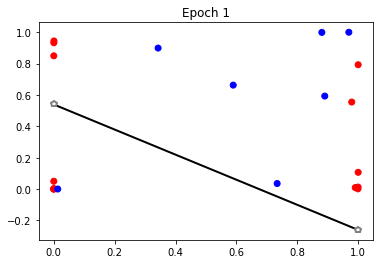

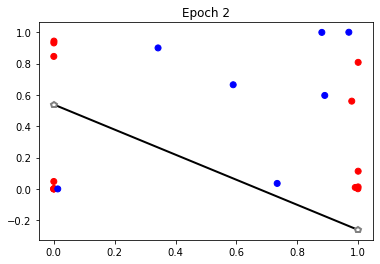

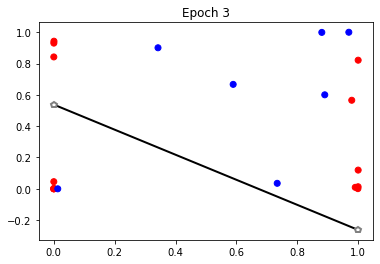

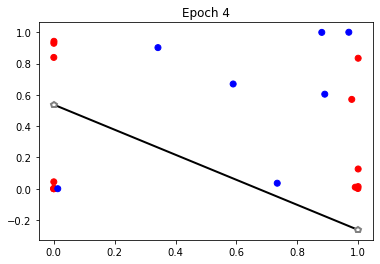

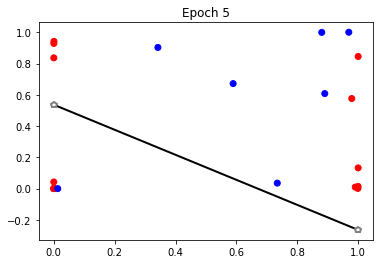

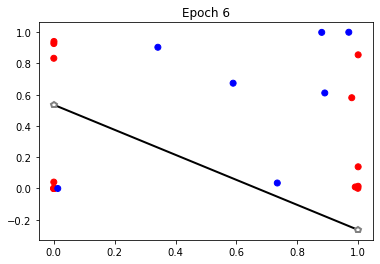

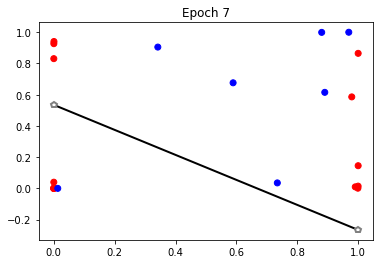

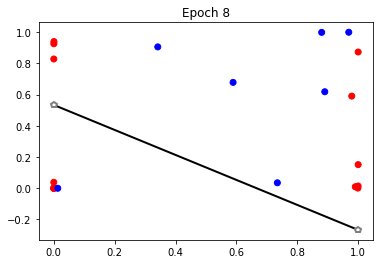

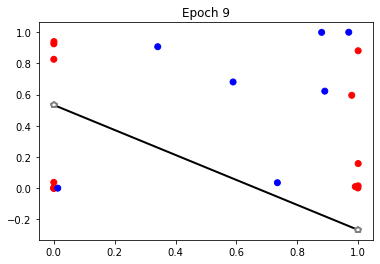

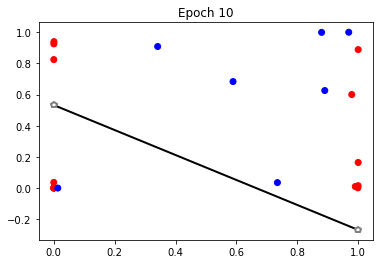

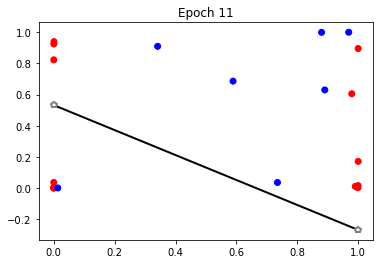

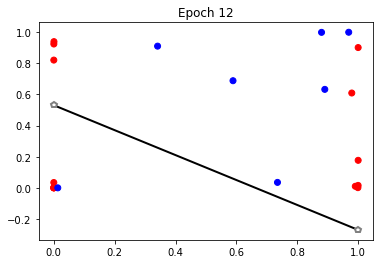

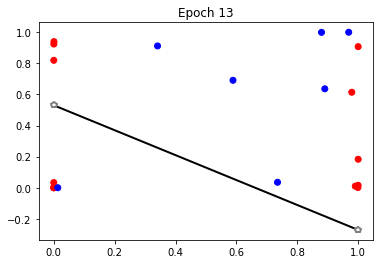

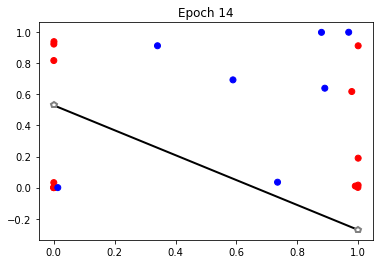

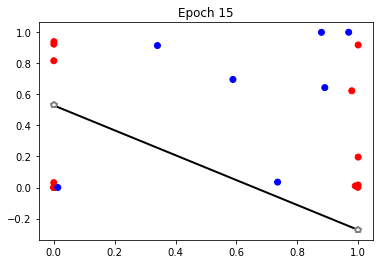

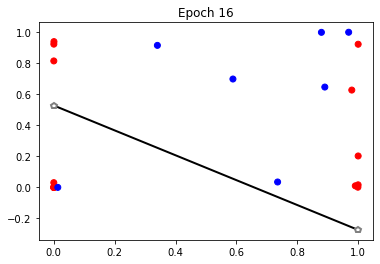

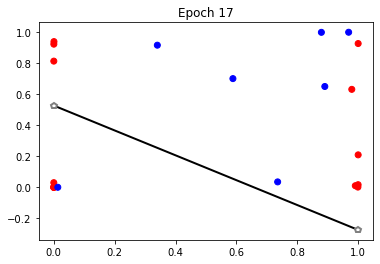

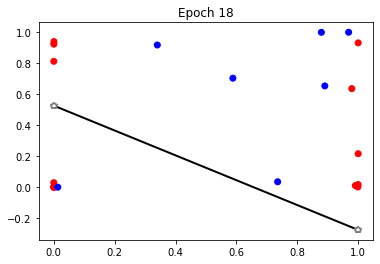

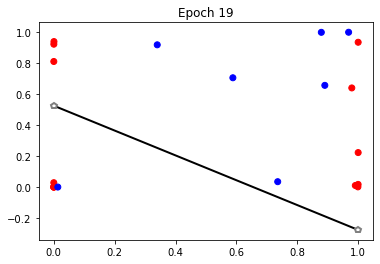

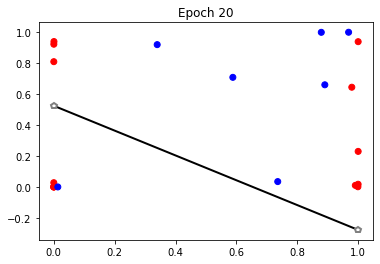

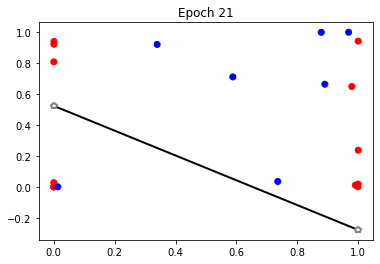

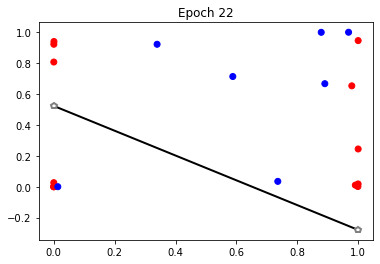

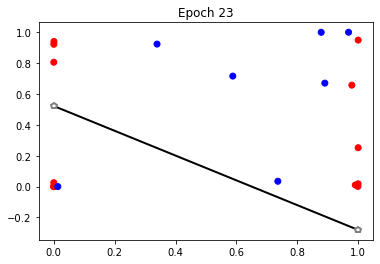

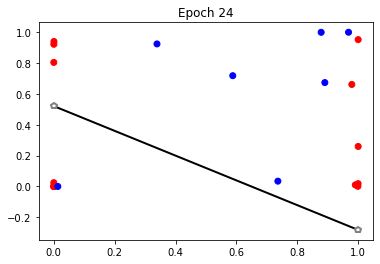

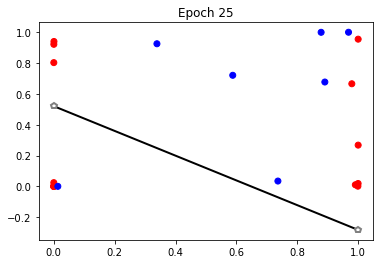

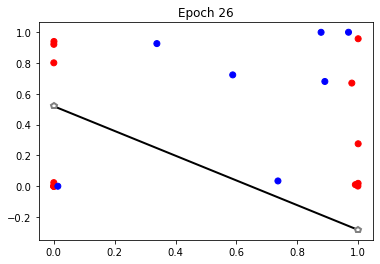

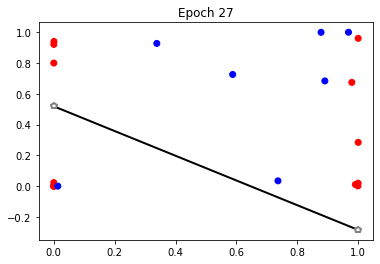

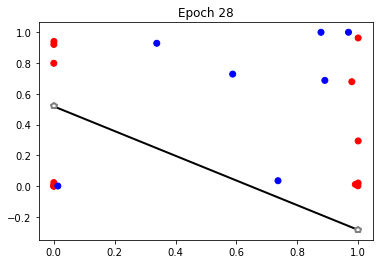

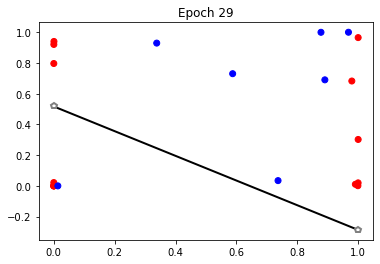

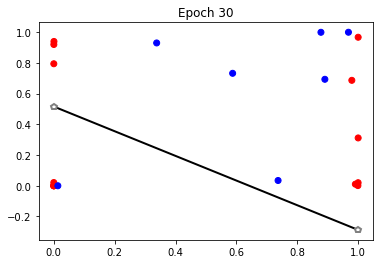

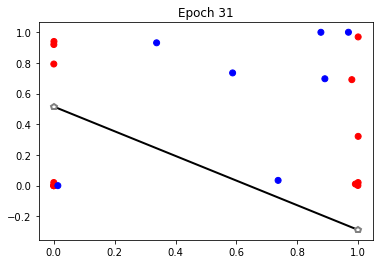

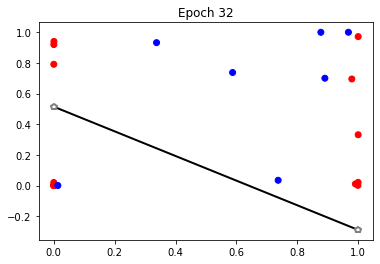

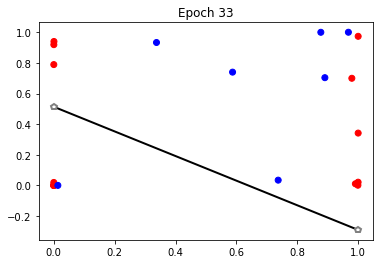

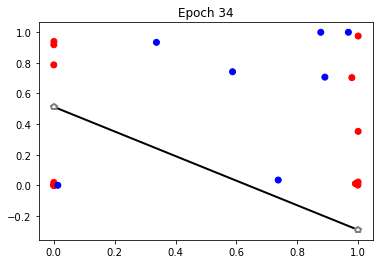

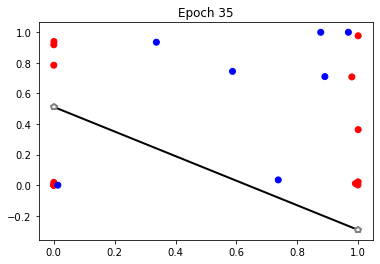

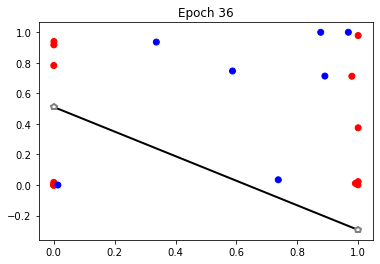

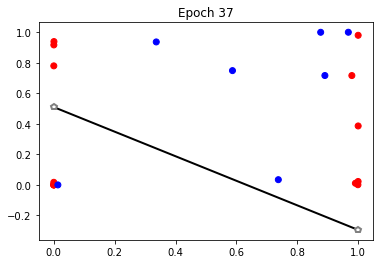

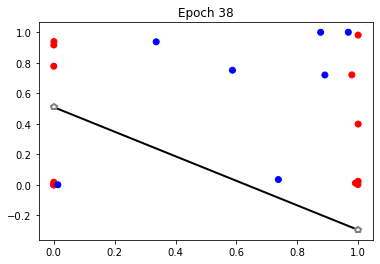

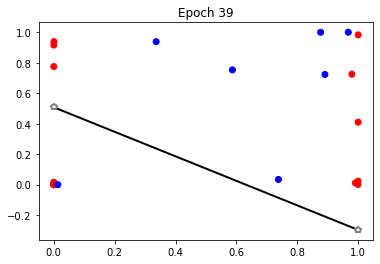

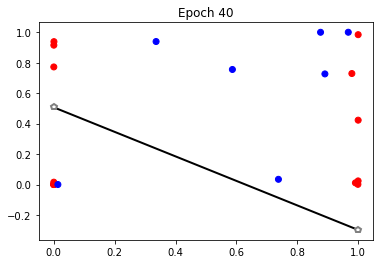

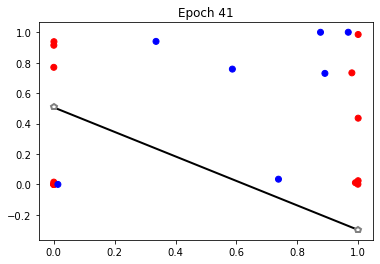

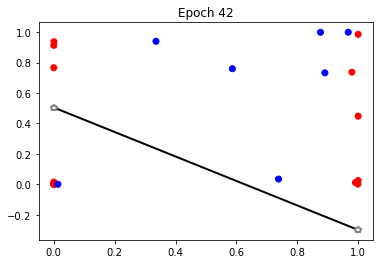

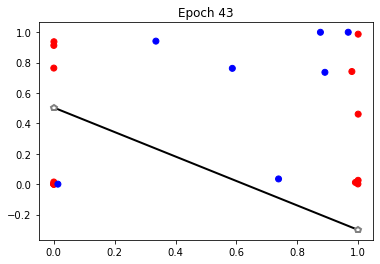

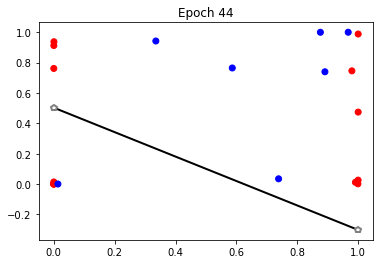

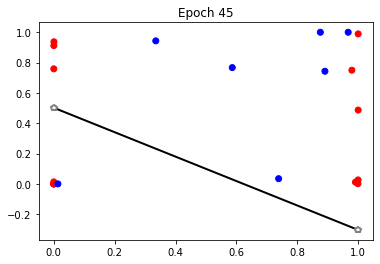

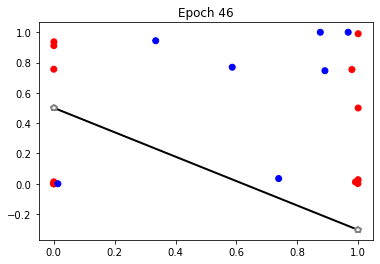

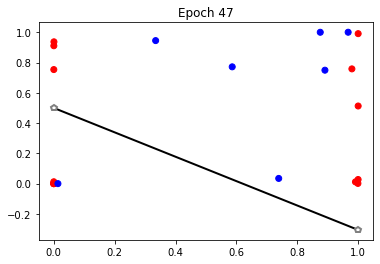

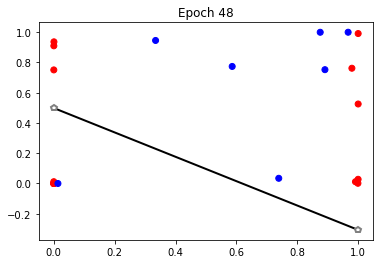

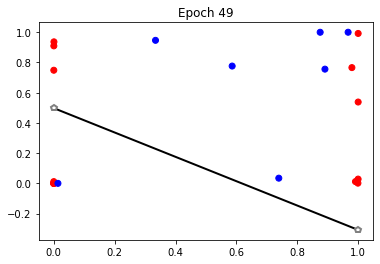

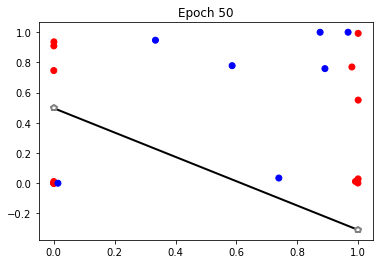

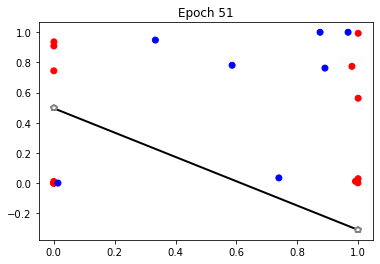

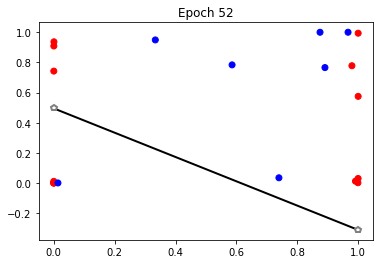

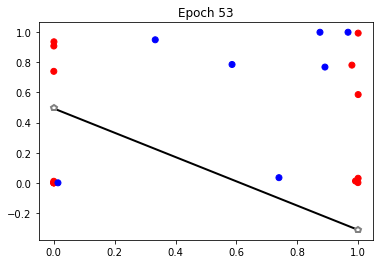

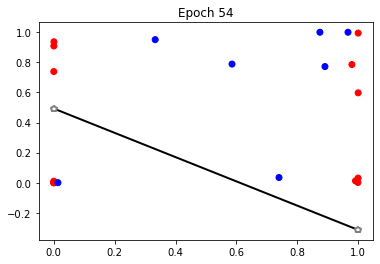

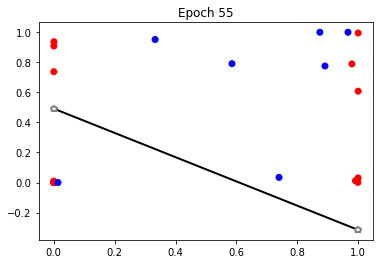

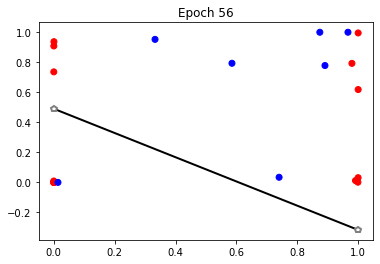

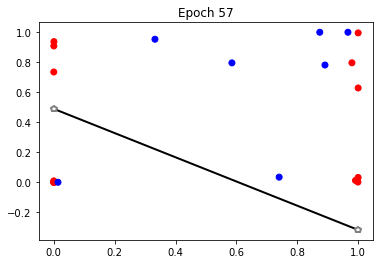

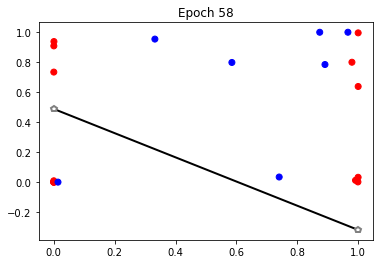

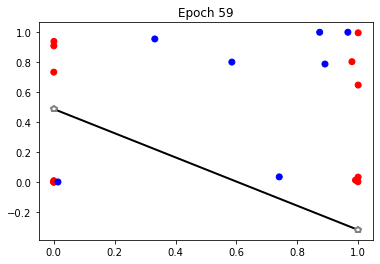

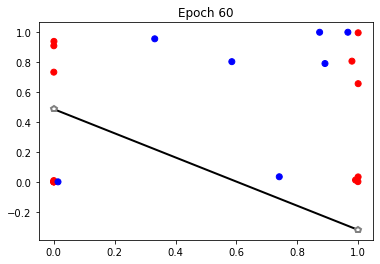

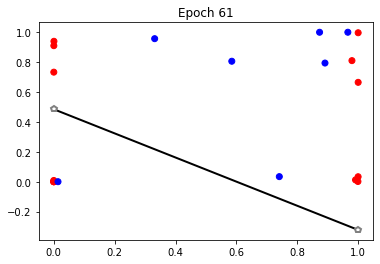

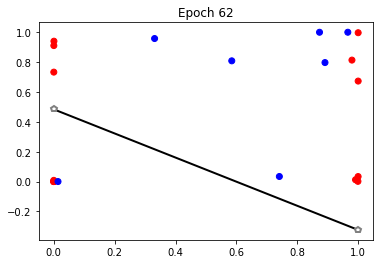

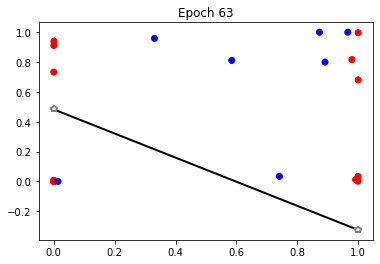

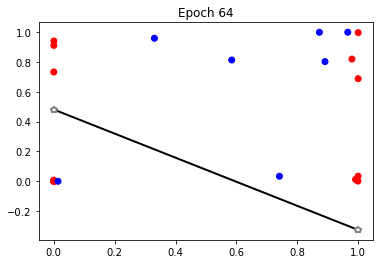

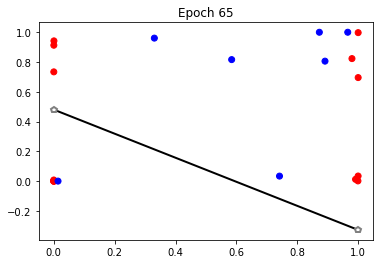

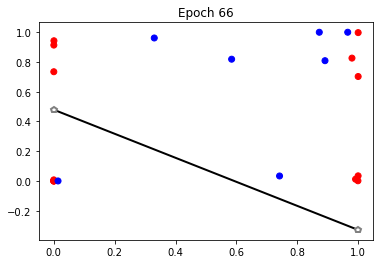

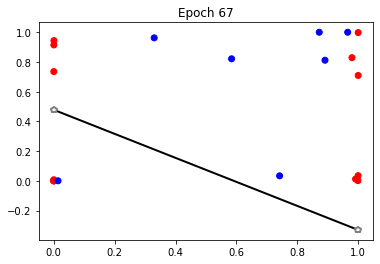

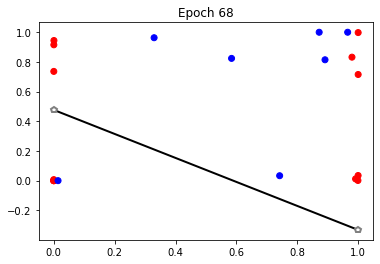

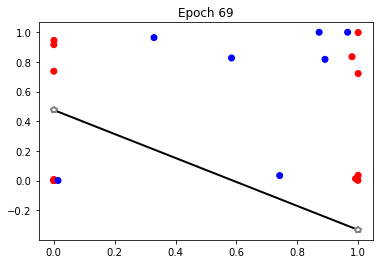

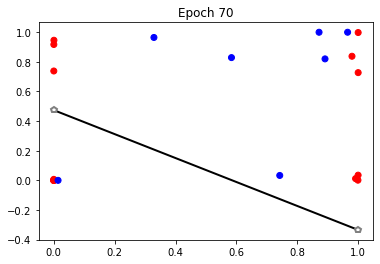

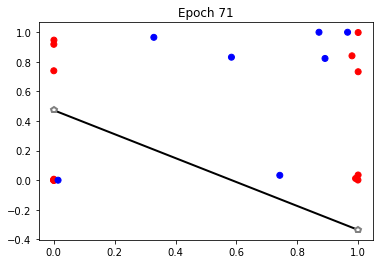

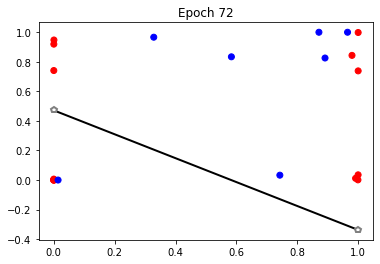

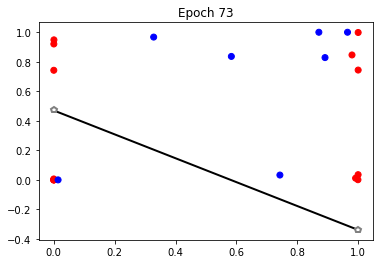

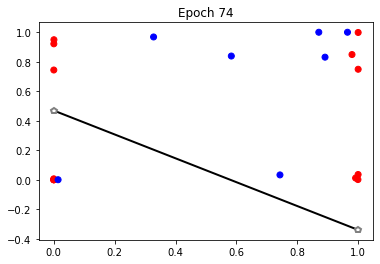

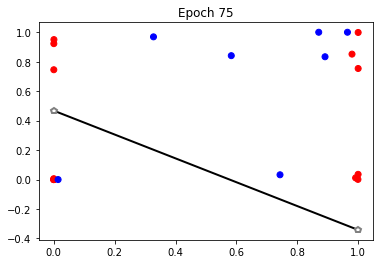

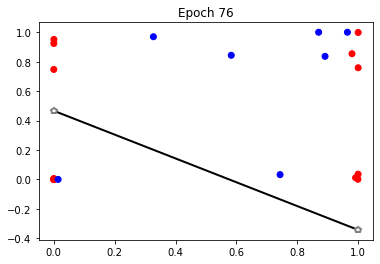

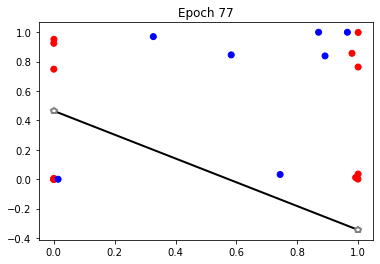

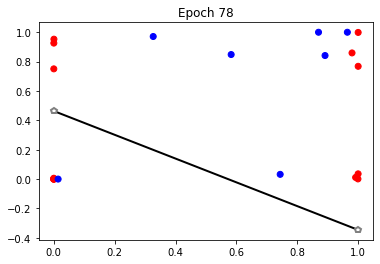

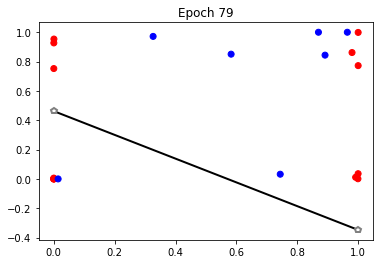

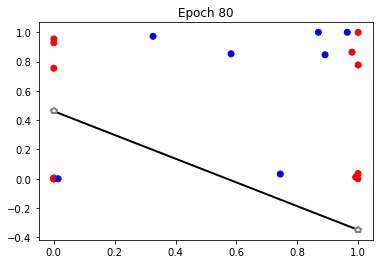

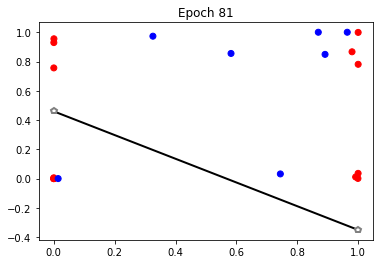

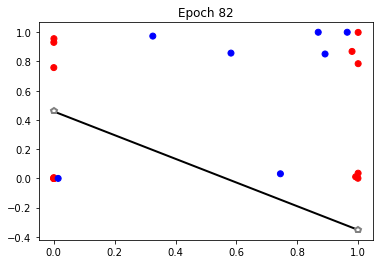

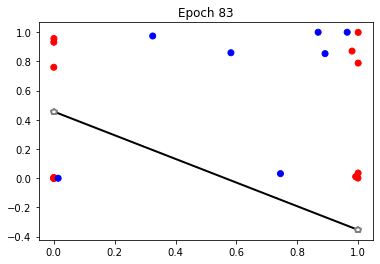

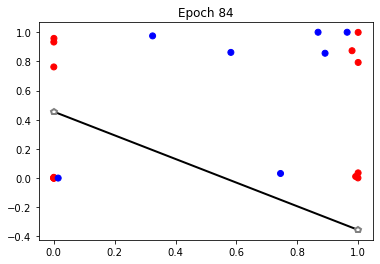

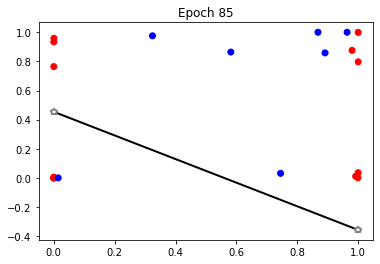

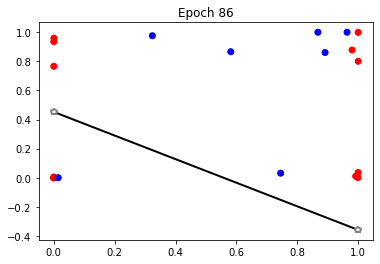

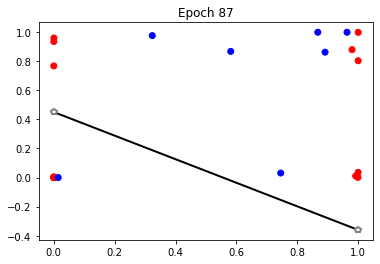

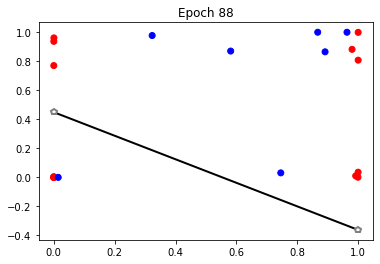

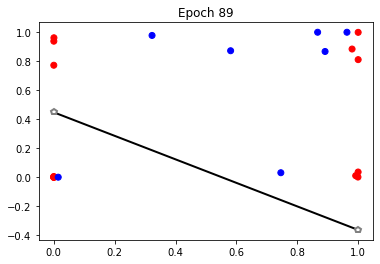

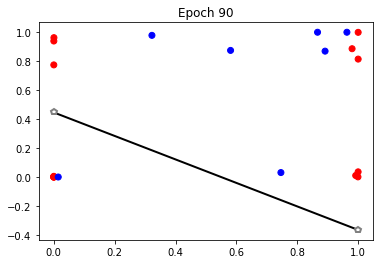

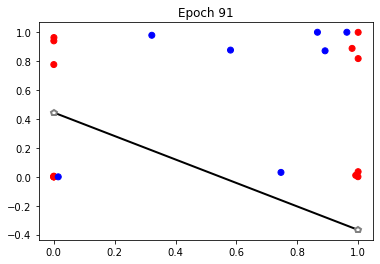

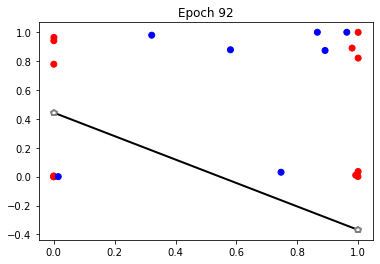

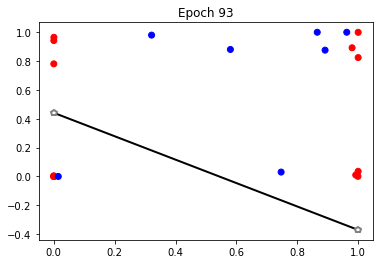

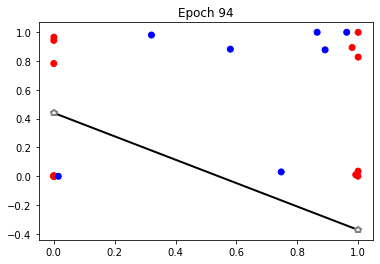

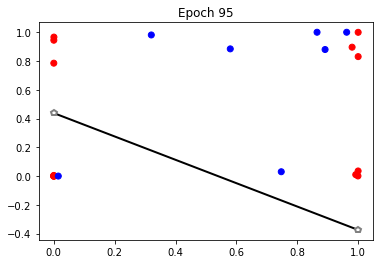

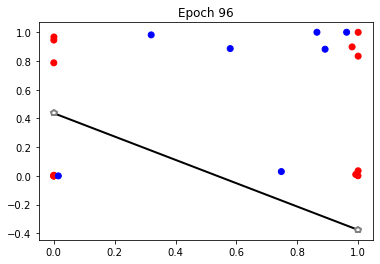

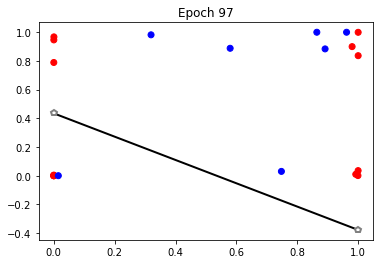

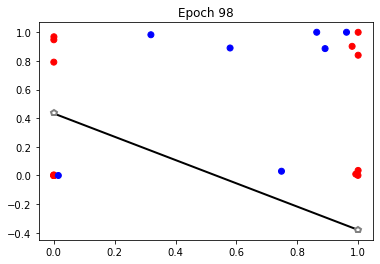

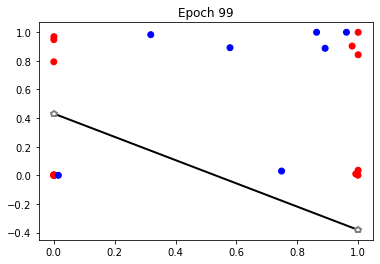

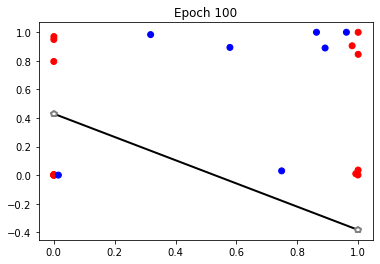

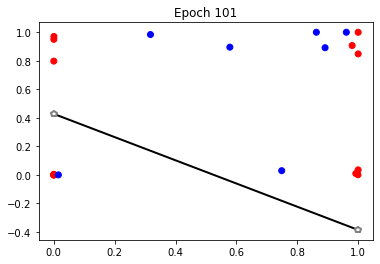

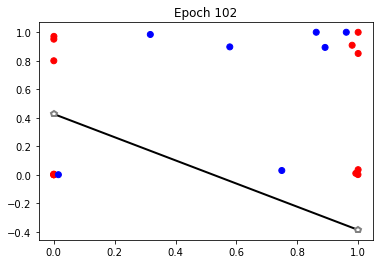

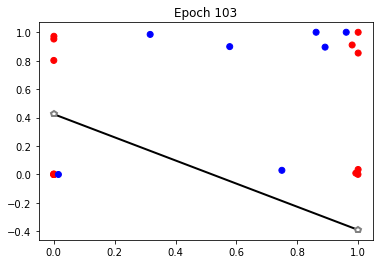

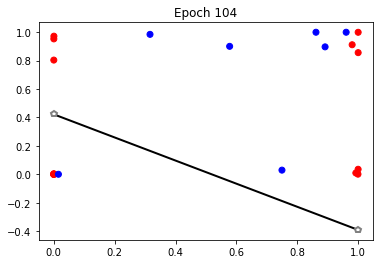

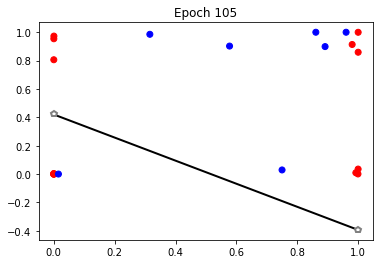

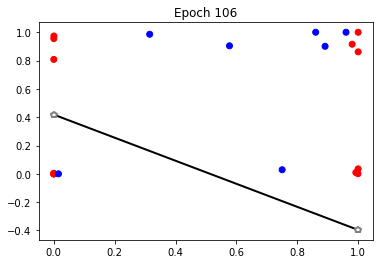

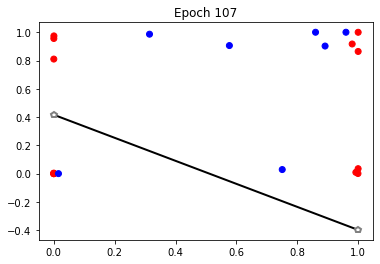

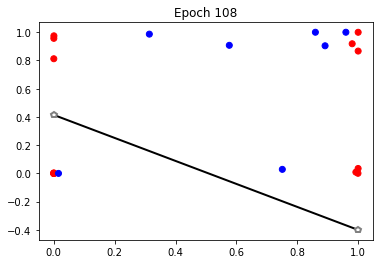

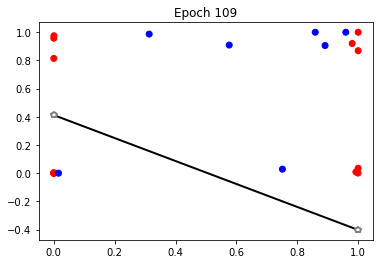

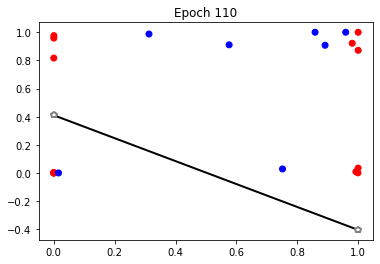

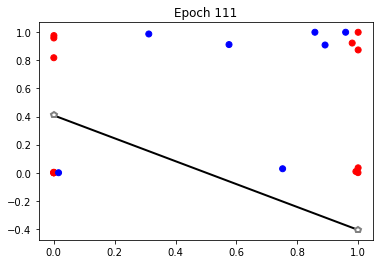

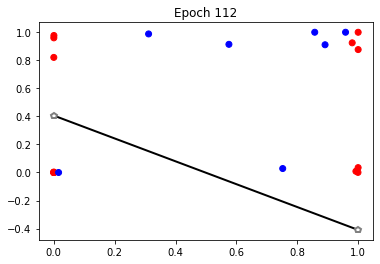

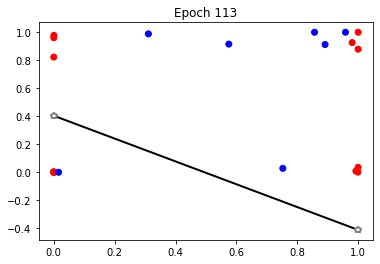

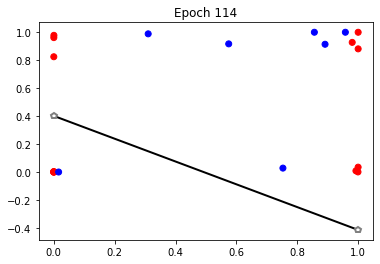

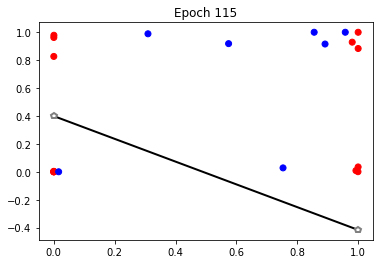

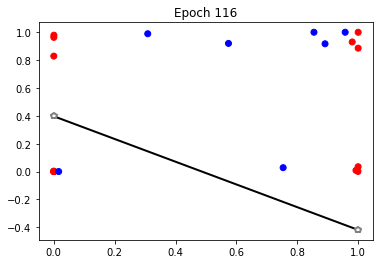

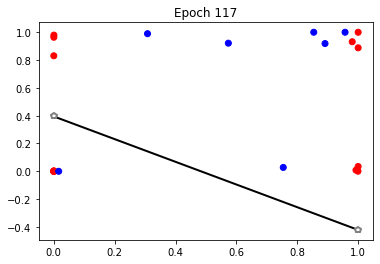

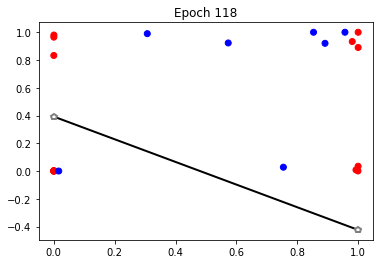

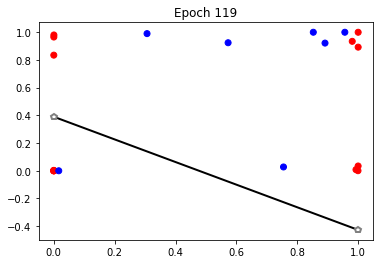

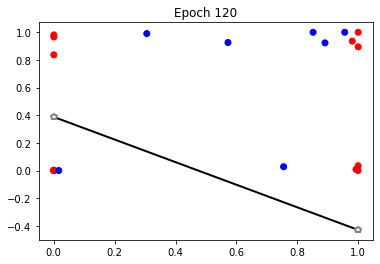

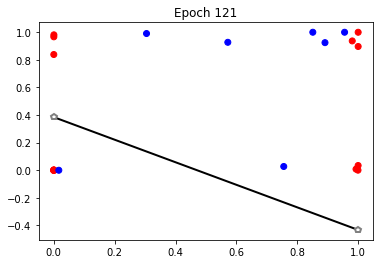

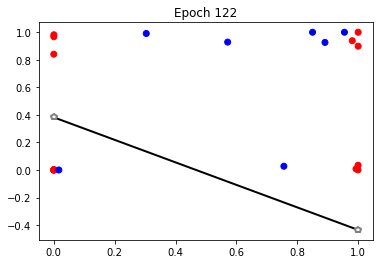

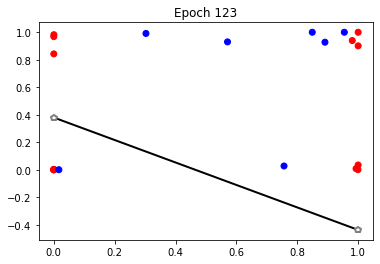

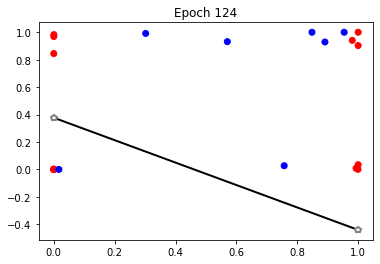

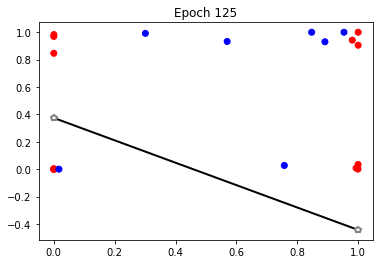

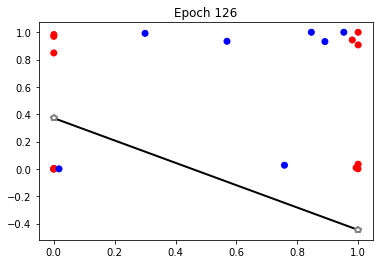

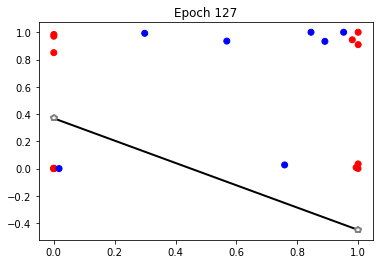

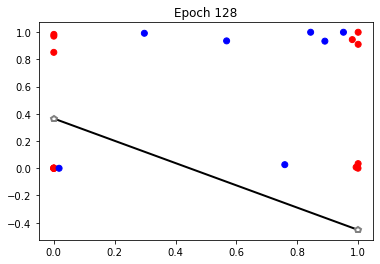

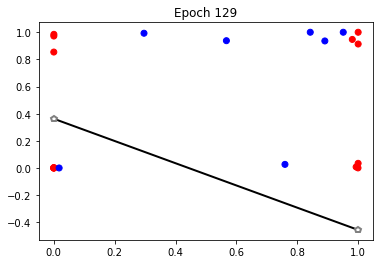

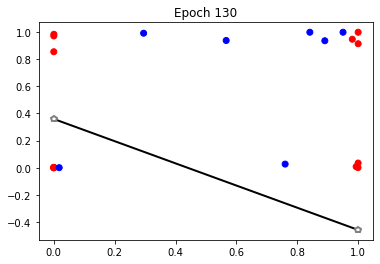

In [10]:
import matplotlib.pyplot as plt

neuralNetGraph=copy.deepcopy(neuralNet)

for i in range(1, 131):
    x = []
    y = []
    colors = []
    
    for vals in trainingSet:  
        for key in neuralNetGraph['Input']:   
            neuralNetGraph['Input'][key]=vals[int(key[1])]
        calcNN(neuralNetGraph)
        deltas = calcDeltasNN(neuralNetGraph, vals[len(vals)-1])
        weights = calcWeightsNN(neuralNetGraph, 0.1, deltas)
        changeWeightsNN(neuralNetGraph, weights)
        
    for vals in trainingSet: 
        for key in neuralNetGraph['Input']:   
            neuralNetGraph['Input'][key]=vals[int(key[1])]
        calcNN(neuralNetGraph)
        x.append(neuralNetGraph['Layer0']['N0']['Out'])
        y.append(neuralNetGraph['Layer0']['N1']['Out'])
        colors.append('red' if vals[2]['N2']==0 else 'blue')
            
    plt.scatter(x, y, color=colors)   
    x1, x2 = 0, 1
    y1 = -(weights['N2']['N0']/weights['N2']['N1'])*x1 - weights['N2']['Bias']/weights['N2']['N1']
    y2 = -(weights['N2']['N0']/weights['N2']['N1'])*x2 - weights['N2']['Bias']/weights['N2']['N1']
    plt.plot([x1, x2], [y1, y2], '-p', color='black', linewidth=2, markerfacecolor='white', 
             markeredgecolor='gray', markeredgewidth=2)
    plt.title("Epoch " + str(i))
    plt.show()
